Le but de ce premier projet était de se familiariser avec pandas et commencer à faire des stats basiques. Le dataset est la liste es arbres plantés à Grenoble, contenant année de plantation, espéces, genres botaniques...<br>
<br>
Les dernières itérations sont plus compliquées, avec des calculs de distance entre arbres ou l'affichage des différents arbres sur des cartes.

# Import libraries and dataset

In [4]:
import pandas as pd
from collections import Counter
import matplotlib
from matplotlib import pyplot as plt
import pylab as P
import folium
import geopy
from geopy.distance import geodesic
from itertools import combinations
from haversine import haversine, Unit
import numpy as np
from folium.plugins import HeatMap

lien data: http://data.metropolegrenoble.fr/ckan/dataset/les-arbres-de-grenoble

In [5]:
df = pd.read_csv('ESP_PUBLIC.IDENTITE_ARBRE.csv', header = 0, index_col=False,names=None)
df_c=df.dropna(subset=['ANNEEDEPLANTATION', 'GENRE_BOTA', 'ESPECE']).copy()

# Iteration 1

## Découverte du dataset

In [6]:
df.tail(50)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
31764,22678,ESP28063,ESP28063,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7092465981930..."
31765,11657,ESP27640,ESP27640,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7084752400658..."
31766,11653,ESP27639,ESP27639,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7092670729750..."
31767,15351,ESP27061,ESP27061,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7091867879498..."
31768,284,ESP26617,ESP26617,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7093472703241..."
31769,7870,ESP26073,ESP26073,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7092723407603..."
31770,7867,ESP26072,ESP26072,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7086917238239..."
31771,22677,ESP25778,ESP25778,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7088722866806..."
31772,11656,ESP25208,ESP25208,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7086921975845..."
31773,11652,ESP25207,ESP25207,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7087357478554..."


In [7]:
df.columns.tolist()

['ELEM_POINT_ID',
 'CODE',
 'NOM',
 'GENRE',
 'GENRE_DESC',
 'CATEGORIE',
 'CATEGORIE_DESC',
 'SOUS_CATEGORIE',
 'SOUS_CATEGORIE_DESC',
 'CODE_PARENT',
 'CODE_PARENT_DESC',
 'ADR_SECTEUR',
 'BIEN_REFERENCE',
 'GENRE_BOTA',
 'ESPECE',
 'VARIETE',
 'STADEDEDEVELOPPEMENT',
 'EQUIPE',
 'REMARQUES',
 'ANNEEDEPLANTATION',
 'RAISONDEPLANTATION',
 'TRAITEMENTCHENILLES',
 'COURRIER',
 'IDENTIFIANTPLU',
 'TYPEIMPLANTATIONPLU',
 'INTITULEPROTECTIONPLU',
 'ANNEEABATTAGE',
 'ESSOUCHEMENT',
 'DIAMETREARBRE',
 'CAUSEABATTAGE',
 'COLLECTIVITE',
 'GeoJSON']

In [8]:
range_annees=int(df['ANNEEDEPLANTATION'].max()-df['ANNEEDEPLANTATION'].min())
range_annees

68

In [9]:
print("Le nombre total d'arbres est :",len(df.index))

Le nombre total d'arbres est : 31814


In [10]:
print("Le nombre d'abres dont l'année d'implantation est inconnue est :",df['ANNEEDEPLANTATION'].isnull().sum())

Le nombre d'abres dont l'année d'implantation est inconnue est : 1392


In [11]:
series_annees_nombre=df_c['ANNEEDEPLANTATION'].value_counts()
print("Le set de data porte sur",len(series_annees_nombre),"années distinctes.")

Le set de data porte sur 59 années distinctes.


In [12]:
print((len(df.index)-df['ANNEEDEPLANTATION'].isnull().sum())/len(series_annees_nombre),"arbres ont été plantés en moyenne par an (ne prend pas en compte les arbres dont l'année de plantation est inconuue.")

515.6271186440678 arbres ont été plantés en moyenne par an (ne prend pas en compte les arbres dont l'année de plantation est inconuue.


In [13]:
print("Le nombre d'arbres plantés en 1988 (année de naissance) est:",df['ANNEEDEPLANTATION'].value_counts()[1988])

Le nombre d'arbres plantés en 1988 (année de naissance) est: 257


In [14]:
print("Le nombre d'arbres plantés en 1988 (année de naissance) est:",df['ANNEEDEPLANTATION'].value_counts()[lambda x: x.index>1988].sum())

Le nombre d'arbres plantés en 1988 (année de naissance) est: 13350


## Le travail des différents maires de Grenoble

In [15]:
dict_maire_mandat={"Léon Martin":(1949,1959),"Albert Michallon":(1960,1965),"Hubert Dubedout":(1966,1983),"Alain Carignon":(1984,1995),"Michel Destot":(1996,2014),"Éric Piolle":(2014,2019)}
{k:df['ANNEEDEPLANTATION'].value_counts() \
     [lambda x: (x.index>=dict_maire_mandat[k][0]) & (x.index<=dict_maire_mandat[k][1])].sum() \
     for k in dict_maire_mandat.keys()}

{'Léon Martin': 482,
 'Albert Michallon': 1513,
 'Hubert Dubedout': 12206,
 'Alain Carignon': 5132,
 'Michel Destot': 9073,
 'Éric Piolle': 2893}

## Genres manquants

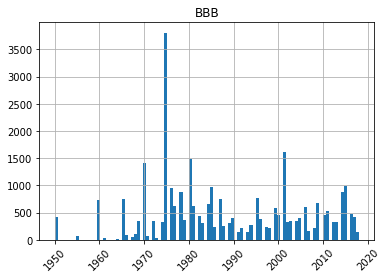

In [13]:
df['ANNEEDEPLANTATION'].hist(bins=100)
plt.title('BBB')
plt.xticks(rotation=45)
plt.show()

In [14]:
print(df[['ANNEEDEPLANTATION','GENRE_BOTA']])

       ANNEEDEPLANTATION GENRE_BOTA
0                 2001.0       Acer
1                 2001.0       Acer
2                 2001.0       Acer
3                 2001.0       Acer
4                 2001.0       Acer
...                  ...        ...
31809             1987.0     Betula
31810             1987.0     Betula
31811             1996.0      Pyrus
31812             1987.0   Magnolia
31813             1987.0     Cedrus

[31814 rows x 2 columns]


In [15]:
print(df['GENRE_BOTA'].isnull().sum(),"genres manquant dans le set complet.")

1064 genres manquant dans le set complet.


In [16]:
print("Le nombre de genre manquants est",df.dropna(subset=['ANNEEDEPLANTATION'])['GENRE_BOTA'].isnull().sum(),"si l'année de plantation est spécifée")

Le nombre de genre manquants est 46 si l'année de plantation est spécifée


# Itération 2

In [17]:
#Proportion genres
series_genres_proportion=df_c['GENRE_BOTA'].value_counts()/len(df_c.index)
df_genres_proportion=pd.DataFrame(series_genres_proportion)
df_genres_proportion=df_genres_proportion.reset_index()
df_genres_proportion.columns=['Genre','Proportion']
df_genres_proportion.head(10)

,Genre,Proportion
0,Platanus,0.158493
1,Acer,0.153620
2,Pinus,0.064610
3,Tilia,0.058019
4,Fraxinus,0.048940
5,Carpinus,0.046450
6,Betula,0.042068
7,Prunus,0.032463
8,Populus,0.028396
9,Liquidambar,0.027905


In [18]:
#Proportion espéces en ne comptant pas les arbres dont soit l'espéce soit le genre ne sont pas spécifiés
series_especes_proportion=((df['GENRE_BOTA']+" "+df['ESPECE']).value_counts())/len(df.dropna(subset=['GENRE_BOTA']).dropna(subset=['ESPECE']).index)
df_especes_proportion=pd.DataFrame(series_especes_proportion)
df_especes_proportion=df_especes_proportion.reset_index()
df_especes_proportion.columns=['Espéces','Proportion']
df_especes_proportion.head(10)

,Espéces,Proportion
0,Platanus acerifolia,0.152859
1,Carpinus betulus,0.045847
2,Acer pseudoplatanus,0.045602
3,Pinus nigra,0.044623
4,Acer platanoides,0.038363
5,Tilia tomentosa,0.034482
6,Acer campestre,0.029725
7,Liquidambar styraciflua,0.027767
8,Fraxinus excelsior,0.026963
9,Betula verrucosa,0.023850


In [19]:
print("Genre botanique unique :")
df[df.groupby('GENRE_BOTA')['GENRE_BOTA'].transform('size') == 1]

Genre botanique unique :


,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
1593,11575,ESP27621,ESP27621,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7136984997141..."
2326,4745,ESP11494,ESP11494,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7355045330412..."
2387,16016,ESP6117,ESP6117,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7351693425883..."
2639,26962,ESP8914,ESP8914,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7354644546661..."
9720,25732,ESP15575,ESP15575,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7251526873669..."
12075,33239,ESP33605,ESP33605,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7371547351883..."
15604,37531,ESP37795,ESP37795,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7342558975379..."
21770,30294,ESP31461,ESP31461,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7414634932485..."
30875,33324,ESP33658,ESP33658,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7171358296992..."
31716,22863,ESP28124,ESP28124,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7204778507877..."


In [20]:
df.dropna(subset=['ANNEEDEPLANTATION']).dropna(subset=['GENRE_BOTA']).dropna(subset=['ESPECE']).groupby(['GENRE_BOTA','ESPECE']).size()

GENRE_BOTA  ESPECE      
Abies       concolor          5
            koreana           1
            nordmanniana     20
            pinsapo           2
Acer        buergerianum     20
                           ... 
Ulmus       minor           144
            parvifolia        1
            resista          24
Zelkova     crenata           2
            serrata         230
Length: 313, dtype: int64

In [21]:
df.nunique()

ELEM_POINT_ID            31814
CODE                     31814
NOM                      31814
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1458
CODE_PARENT_DESC          1458
ADR_SECTEUR                  6
BIEN_REFERENCE           31814
GENRE_BOTA                 112
ESPECE                     257
VARIETE                    183
STADEDEDEVELOPPEMENT         3
EQUIPE                       0
REMARQUES                    9
ANNEEDEPLANTATION           59
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
COURRIER                     0
IDENTIFIANTPLU              46
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE                 2
GeoJSON                  31813
dtype: i

In [22]:
df_grouped = df_c.groupby(['GENRE_BOTA','ESPECE']).size().copy()
print("Le nombre d'arbres dont l'espéce est unique à Grenoble est",
      len(df_grouped[lambda x: x==1].index),end=".")

Le nombre d'arbres dont l'espéce est unique à Grenoble est 52.

In [23]:
df_2006 = df_c[['ANNEEDEPLANTATION','GENRE_BOTA','ESPECE']].where(df_c['ANNEEDEPLANTATION']<=2006).copy()
df_2006 = df_2006.groupby(['GENRE_BOTA','ESPECE']).size()
print("Le nombre d'arbres dont l'espéce est unique à Grenoble en 2006 est",
      len(df_2006[lambda x: x==1].index),end=".")

Le nombre d'arbres dont l'espéce est unique à Grenoble en 2006 est 42.

In [24]:
df_2006 = df_c[['ANNEEDEPLANTATION','GENRE_BOTA','ESPECE']].where(df_c['ANNEEDEPLANTATION']<=2006).copy()
df_2006 = df_2006.groupby(['GENRE_BOTA','ESPECE']).size()
print("Le nombre despéces uniques à Grenoble en 2006 est",
      len(df_2006.index),end=".")

Le nombre despéces uniques à Grenoble en 2006 est 214.

##  Comment la pratique de plantation a-t-elle évolué au cours du temps ?

### Nombre de nouveaux genres introduits par années

In [25]:
s_g=df_c.groupby(['GENRE_BOTA'])['ANNEEDEPLANTATION'].min()
s_g

GENRE_BOTA
Abies           1960.0
Acer            1960.0
Aesculus        1950.0
Ailanthus       1975.0
Alnus           1966.0
                 ...  
Thuja           1960.0
Tilia           1950.0
Trachycarpus    1980.0
Ulmus           1960.0
Zelkova         1970.0
Name: ANNEEDEPLANTATION, Length: 109, dtype: float64

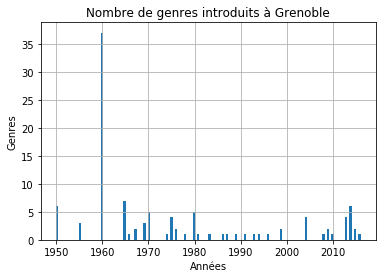

In [26]:
s_g.hist(bins=range_annees*2)
plt.xlabel('Années')
plt.ylabel('Genres')
plt.title('Nombre de genres introduits à Grenoble')
plt.show()

### Nombre de nouvelles espéces introduites par années

In [27]:
s_e=df_c.groupby(['GENRE_BOTA','ESPECE'])['ANNEEDEPLANTATION'].min()

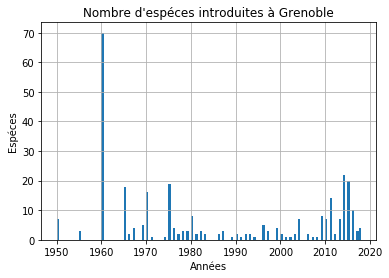

In [28]:
s_e.hist(bins=range_annees*2)
plt.xlabel('Années')
plt.ylabel('Espéces')
plt.title("Nombre d'espéces introduites à Grenoble")
plt.show()

### Evolution de l'espéce dominante (Platanus acerifolia)


In [29]:
df_platanus=df_c[(df_c['GENRE_BOTA'] == 'Platanus') & (df_c['ESPECE'] == 'acerifolia')].copy()

In [30]:
s_platanus_annee = (df_platanus['ANNEEDEPLANTATION'].value_counts().sort_index().cumsum() \
    / df_c['ANNEEDEPLANTATION'].value_counts().sort_index().cumsum())*100
s_platanus_annee = s_platanus_annee.dropna()

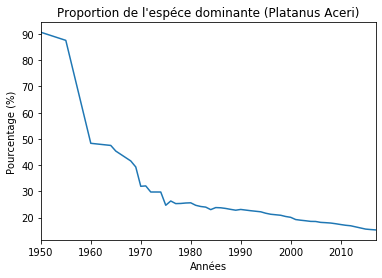

In [31]:
s_platanus_annee.plot()
plt.xlabel('Années')
plt.ylabel('Pourcentage (%)')
plt.title("Proportion de l'espéce dominante (Platanus Aceri)")
plt.show()

### Evolution du nombre d'espéces présentes en fonction du temps

In [32]:
s_especes_annees_introduction = df_c.groupby(['GENRE_BOTA','ESPECE'])['ANNEEDEPLANTATION'].min()
s_especes_annees_introduction = s_especes_annees_introduction.value_counts().sort_index().cumsum()

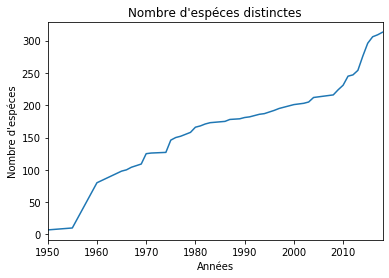

In [33]:
s_especes_annees_introduction.plot()
plt.xlabel('Années')
plt.ylabel("Nombre d'espéces")
plt.title("Nombre d'espéces distinctes")
plt.show()

# Itération 3

## Genres-espéces non désirées (recommendations métropole Grenoble)

In [34]:
set_genre_non_desiree = {'Aesculus','Fraxinus','Platanus','Betula','Castanea','Cupressus','Olea' }
set_especes_non_desiree = {'Acer saccharinum',
                            'Albizzia julibrissin',
                            'Catalpa bignonoides',
                            'Ginkgo biloba',
                            'Gleditsia triacanthos',
                            'Koelreuteria paniculata',
                            'Laburnum anagyroides',
                            'Paulownia tomentosa',
                            'Prunus pissardi',
                            'Sophora japonica',
                            'Acer palmatum',
                            'Acer pseudoplatanus',
                           'Cryptomeria japonica',
                            'Davidia involucrata',
                           'Fagus sylvatica',
                           'Juglans nigra',
                           'Juglans ailantifolia',
                            'Liriodendron tulipifera',
                           'Magnolia grandiflora',
                           'Nerium oleander',
                           'Picea abies',
                           'Populus alba',
                           'Quercus bicolor',
                           'Quercus macrocarpa',
                           'Quercus nigra',
                           'Quercus rubra',
                           'Quercus alba',
                           'Salix alba',
                           'Salix gracolistyla',
                           'Salix daphnoides',
                           'Salix cinerea',
                           'Salix arenaria',
                           'Salix acutifolia',
                           'Sorbus aucuparia',
                           'Ailanthus altissima',
                            'Robinia pseudoacacia',
                            'Acer negundo',
                            'Acer platanoides',
                            'Acer pseudoplatanus'
                          }

In [35]:
df_gnd = df_c[df_c['GENRE_BOTA'].isin(set_genre_non_desiree)]

In [36]:
df_end = df_c[(df_c['GENRE_BOTA']+" "+df_c['ESPECE']).isin(set_especes_non_desiree)]
s_proportion_non_desiree = df_end['ANNEEDEPLANTATION'].value_counts().sort_index().cumsum() \
    / df_c['ANNEEDEPLANTATION'].value_counts().sort_index().cumsum() *100
s_proportion_non_desiree = s_proportion_non_desiree.dropna()

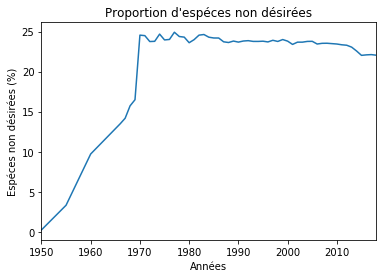

In [37]:
s_proportion_non_desiree.plot()
plt.xlabel('Années')
plt.ylabel("Espéces non désirées (%)")
plt.title("Proportion d'espéces non désirées")
plt.show()

In [38]:
df_end = df_c[(df_c['GENRE_BOTA']+" "+df_c['ESPECE']).isin(set_especes_non_desiree)]
df_ed = df_c[~(df_c['GENRE_BOTA']+" "+df_c['ESPECE']).isin(set_especes_non_desiree)]

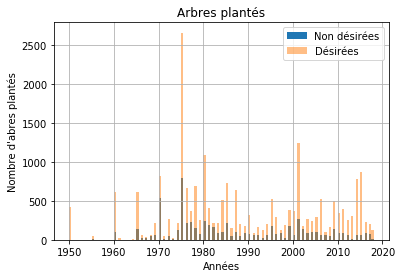

In [39]:
df_end['ANNEEDEPLANTATION'].hist(bins=range_annees*2,alpha=1, label='Non désirées')
df_ed['ANNEEDEPLANTATION'].hist(bins=range_annees*2,alpha=.5, label='Désirées')
plt.xlabel('Années')
plt.ylabel("Nombre d'abres plantés")
plt.legend(loc='upper right')
plt.title('Arbres plantés')
plt.show()

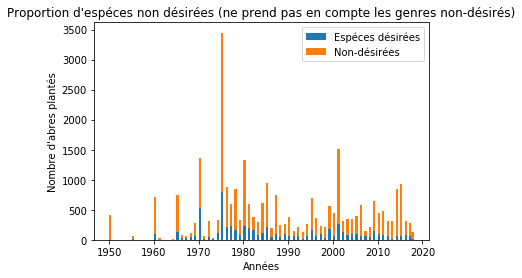

In [40]:
set_data1=df_end['ANNEEDEPLANTATION']
set_data2=df_ed['ANNEEDEPLANTATION']
plt.hist([set_data1,set_data2],bins=range_annees*2,alpha=1,stacked=True,label=['Espéces désirées','Non-désirées'])
plt.xlabel('Années')
plt.ylabel("Nombre d'abres plantés")
plt.legend(loc='upper right')
plt.title("Proportion d'espéces non désirées (ne prend pas en compte les genres non-désirés)")
plt.show()

In [41]:
df_nd = df_c[((df_c['GENRE_BOTA']+" "+df_c['ESPECE']).isin(set_especes_non_desiree)) | (df_c['GENRE_BOTA'].isin(set_genre_non_desiree))]
df_d = df_c[~(((df_c['GENRE_BOTA']+" "+df_c['ESPECE']).isin(set_especes_non_desiree)) | (df_c['GENRE_BOTA'].isin(set_genre_non_desiree)))]

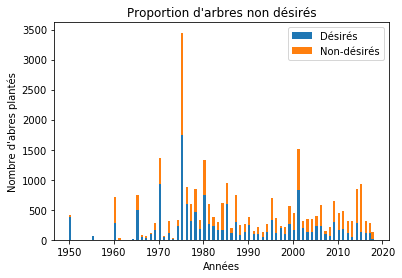

In [42]:
set_data1=df_nd['ANNEEDEPLANTATION']
set_data2=df_d['ANNEEDEPLANTATION']
plt.hist([set_data1,set_data2],bins=range_annees*2,alpha=1,stacked=True,label=['Désirés','Non-désirés'])
plt.xlabel('Années')
plt.ylabel("Nombre d'abres plantés")
plt.legend(loc='upper right')
plt.title("Proportion d'arbres non désirés")
plt.show()

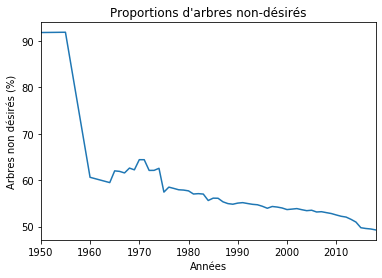

In [43]:
s_proportion_arbres_non_desires = df_nd['ANNEEDEPLANTATION'].value_counts().sort_index().cumsum() \
    / df_c['ANNEEDEPLANTATION'].value_counts().sort_index().cumsum() *100
s_proportion_arbres_non_desires = s_proportion_arbres_non_desires.dropna()

s_proportion_arbres_non_desires.plot()
plt.xlabel('Années')
plt.title("Proportions d'arbres non-désirés")
plt.ylabel("Arbres non désirés (%)")
plt.show()

pas plus de 10 % d'une espéce, 20 % d'un genre.

In [44]:
(0.20*df_c['GENRE_BOTA'].value_counts().sum()-df_c['GENRE_BOTA'].value_counts())/0.8

Platanus       1480.00
Acer           1653.75
Pinus          4827.50
Tilia          5062.50
Fraxinus       5386.25
                ...   
Sciadopitys    7130.00
Nyssa          7130.00
Rhamnus        7130.00
Staphylea      7130.00
Sequoia        7130.00
Name: GENRE_BOTA, Length: 109, dtype: float64

In [45]:
print("Cette liste représente le nombre d'arbres qu'il ne faut pas planter en plus pour respecter les 20% maximum d'un genre.")

Cette liste représente le nombre d'arbres qu'il ne faut pas planter en plus pour respecter les 20% maximum d'un genre.


In [46]:
seriseries_especes_proportiones_especes_proportion=((df['GENRE_BOTA']+" "+df['ESPECE']).value_counts())
len(df.dropna(subset=['GENRE_BOTA']).dropna(subset=['ESPECE']).index)

28595

# Itération 4

## Nettoyage données, conversion en lat/lon

In [47]:
df.nunique()

ELEM_POINT_ID            31814
CODE                     31814
NOM                      31814
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1458
CODE_PARENT_DESC          1458
ADR_SECTEUR                  6
BIEN_REFERENCE           31814
GENRE_BOTA                 112
ESPECE                     257
VARIETE                    183
STADEDEDEVELOPPEMENT         3
EQUIPE                       0
REMARQUES                    9
ANNEEDEPLANTATION           59
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
COURRIER                     0
IDENTIFIANTPLU              46
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE                 2
GeoJSON                  31813
dtype: i

In [48]:
cols_to_drop = df.columns[(df.nunique()<=10) ]

In [49]:
df.drop(columns=cols_to_drop,inplace=True)

In [18]:
df['Nom_scientifique']=df.GENRE_BOTA + ' ' + df.ESPECE

In [19]:
df

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON,Nom_scientifique
0,31906,ESP32632,ESP32632,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407272631197...",Acer pseudoplatanus
1,31905,ESP32631,ESP32631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407481744995...",Acer pseudoplatanus
2,31904,ESP32630,ESP32630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7406973948781...",Acer pseudoplatanus
3,31903,ESP32629,ESP32629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7406754967071...",Acer pseudoplatanus
4,31902,ESP32628,ESP32628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407015656395...",Acer pseudoplatanus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31809,11290,ESP18364,ESP18364,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7385133327466...",Betula verrucosa
31810,11256,ESP18346,ESP18346,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7375284639688...",Betula verrucosa
31811,14981,ESP17096,ESP17096,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7384331724843...",Pyrus calleryana
31812,14939,ESP17074,ESP17074,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7373296228308...",Magnolia soulangeana


In [20]:
Json_sample=df.loc[5,'GeoJSON']
coord=Json_sample.split(sep='"')[-1]
coord=coord.strip(":'[{}]")
coord=coord.split(sep=',')
latitude=float(coord[1])
longitude=float(coord[0])
print(latitude,longitude)

45.1912288598277 5.73982777571091


In [21]:
coord=df['GeoJSON'].apply(lambda x: x.split(sep='"')[-1].strip(":'[{}]").split(sep=','))
df[['latitude','longitude']]=pd.DataFrame(coord.values.tolist(),index=df.index)
df.drop(columns=['GeoJSON'],inplace=True)

In [22]:
df['latitude']=df['latitude'].astype(float)
df['longitude']=df['longitude'].astype(float)

## Quelques affihcages sur cartes

In [23]:
loc_Grenoble=[45.1667,5.7167]

In [24]:
m = folium.Map(location=loc_Grenoble,zoom_start=13)
[folium.Marker([df.loc[k,'longitude'],df.loc[k,'latitude']],popup=df.iloc[k]['ELEM_POINT_ID']).add_to(m) for k in range(2)]
m

In [25]:
m = folium.Map(location=loc_Grenoble,zoom_start=13)
for k in range(0,100):
    folium.Marker([df.iloc[k]['longitude'],df.iloc[k]['latitude']], popup=df.iloc[k]['ELEM_POINT_ID']).add_to(m)
m

In [26]:
#comparaison des différents algos permettant de calculer une distance entre deux points géolocalisés.
#%%timeit

geodesic((df.iloc[5]['longitude'],df.iloc[5]['latitude']),([df.iloc[15000]['longitude'],df.iloc[15000]['latitude']])).meters

3316.809063653468

In [27]:
%%timeit

haversine((df.iloc[5]['longitude'],df.iloc[5]['latitude']),([df.iloc[15000]['longitude'],df.iloc[15000]['latitude']]))

516 µs ± 6.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
m = folium.Map(location=loc_Grenoble,zoom_start=13)
folium.Marker([df.iloc[5]['longitude'],df.iloc[5]['latitude']], popup=df.iloc[5]['ELEM_POINT_ID']).add_to(m)
folium.Marker([df.iloc[15000]['longitude'],df.iloc[15000]['latitude']], popup=df.iloc[15000]['ELEM_POINT_ID']).add_to(m)

m

### DIstance moyenne entre arbres

Sélection de 5% d'arbres aléatoires pour réduire le temps de calcul.

In [61]:
#distances=[geodesic((df_short.iloc[pair_arbres[i][0]]['longitude'],df_short.iloc[pair_arbres[i][0]]['latitude']),(df_short.iloc[pair_arbres[i][1]]['longitude'],df_short.iloc[pair_arbres[i][1]]['latitude'])).meters for i in range(0,len(pair_arbres))]

In [29]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [65]:
dist=[]
for i in range(0,10):
    df_short=df.sample(frac=0.2)
    df_short.reset_index(inplace=True)

    pair_arbres=[(i1,i2) for i1,i2 in combinations(df_short.index, 2)]
    pair_arbres_lon=[(i1,i2) for i1,i2 in combinations(df_short['longitude'], 2)]
    pair_arbres_lat=[(i1,i2) for i1,i2 in combinations(df_short['latitude'], 2)]

    tlist=list(zip(*pair_arbres_lon))
    lon1=tlist[0]
    lon2=tlist[1]
    tlist=list(zip(*pair_arbres_lat))
    lat1=tlist[0]
    lat2=tlist[1]

    lon1=np.array(lon1)
    lon2=np.array(lon2)
    lat1=np.array(lat1)
    lat2=np.array(lat2)

    dfnp = pd.DataFrame(data={'lon1':lon1,'lon2':lon2,'lat1':lat1,'lat2':lat2})

    km = haversine_np(dfnp['lon1'],dfnp['lat1'],dfnp['lon2'],dfnp['lat2'])

    dist.append(sum(km)/len(km))

In [69]:
print("10 itérations sur des sets de 20% d'abres aléatoires, la distance moyenne entre arbres est :",round(sum(dist)/len(dist),2),"km")

10 itérations sur des sets de 20% d'abres aléatoires, la distance moyenne entre arbres est : 2.46 km


# HeatMap

In [30]:
lats=list(df['latitude'])
lons=list(df['longitude'])
mag=[1]*len(lats)

m = folium.Map(location=loc_Grenoble,zoom_start=13)
HeatMap(zip(lons, lats, mag),radius=5).add_to(m)

m